# Shopping behavior 

I am making a project with the data set : Consumer buying behavior from Kaggel.com.

### Problem
The problem/project is to see if we can predict shopping behavior based on : Income, Age and who of the customers are most likely to shop. The dataset are based on data from customers that have seen an advertisement and did a buy from that. we shal make a predictive model to analyse if we can predict who is most likley to shop. We also want to present findings in a Tablaou dashboard

### The dataset/Column Descriptions: :
* Age
* EstimatedSalary
* Purchased (1 = sale, 0 = no sale) 



### 1. Getting the data ready 

In [1]:
# import functions that we want to use. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# importing the dataset and show the data 
data = pd.read_csv("social_ads.csv")
data.head()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
# See som key data of the dataset
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [4]:
# Cheek the type of data, and see if there are any missing data? 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


### Some quick analyses of the data! 
* the age is from 18-60 years old in the dataset.
* the mean age of the dataset is 37.5 years old
* The max estimated sallary of the asked people is 150 000
* The min estimated sallary of the asked people is 15 000
* The mean sallary of the asked people is 69 742, 5
* We have 400 rows of data in our dataset 



#### More Analyses 

In [5]:
# We want to assure that the mean arent wrong, if there is a big Outlier in the sallary, it can effect the Mean drastic,
# we want to test the z score to see if many points away from the mean

from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(data['EstimatedSalary']))
outliers = data[(z_scores > 3)]
print (outliers)



Empty DataFrame
Columns: [Age, EstimatedSalary, Purchased]
Index: []


##### We dont have any ouliers in the sallery collum regarding our test at the z-score

In [6]:
# We do another test, we also cheek a scatterplot 

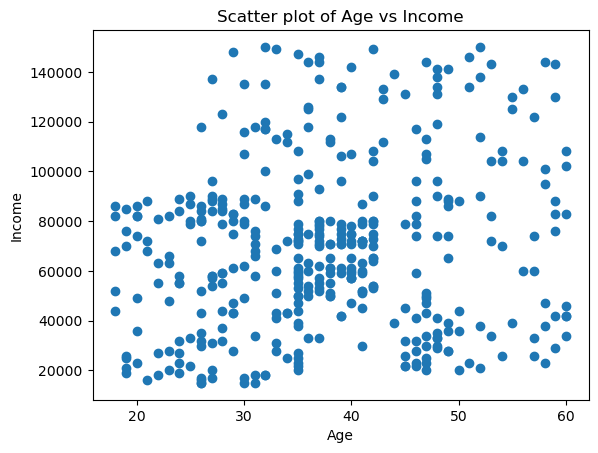

In [7]:
import matplotlib.pyplot as plt

plt.scatter(data['Age'], data['EstimatedSalary'])
plt.title('Scatter plot of Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


##### We dont have any ouliers in the sallery collum regarding our test at the scatterplot

### Making a new dataframe and do some more analyzez of the people that did buy
From a busines perspective is is interesting to find out who the people are, what diference them from the people tht did not buy

In [8]:
# We want to make a new dataframe from people that actual has bought somthing.
data_bougth = data[data["Purchased"] == 1]

In [9]:
data_bougth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 7 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              143 non-null    int64
 1   EstimatedSalary  143 non-null    int64
 2   Purchased        143 non-null    int64
dtypes: int64(3)
memory usage: 4.5 KB


In [10]:
# We want to find out how many percent of the dataset that did buy after the campain  
percent = len(data_bougth.index) * 100 / len(data.index)
print (f" {percent}% of the dataset has Bought after advertising")

 35.75% of the dataset has Bought after advertising


#### We also plot the percent in a pie plot for visualization 

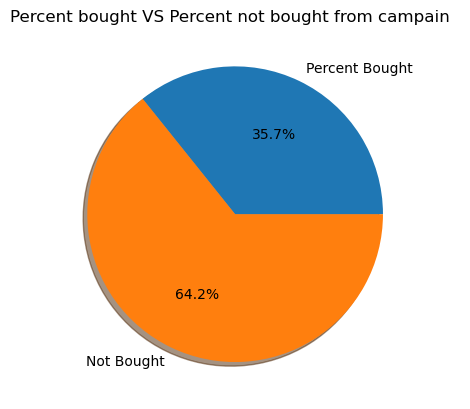

In [11]:
import matplotlib.pyplot as plt


total_value = len(data.index)
percent_of_total = 35.75  

# Calculate the actual value from the percentage
actual_value = total_value * (percent_of_total / 100)

# Create labels for the pie chart
labels = ['Percent Bought', 'Not Bought']

# Create values for the pie chart
values = [actual_value, total_value - actual_value]

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%.1f%%', shadow=True)

# Add a title
plt.title('Percent bought VS Percent not bought from campain  ')

# Show the plot
plt.show()


In [12]:
data_bougth.describe()

,Age,EstimatedSalary,Purchased
count,143.000000,143.000000,143.0
mean,46.391608,86272.727273,1.0
std,8.612172,42064.200064,0.0
min,27.000000,20000.000000,1.0
25%,39.500000,41000.000000,1.0
50%,47.000000,90000.000000,1.0
75%,53.000000,122500.000000,1.0
max,60.000000,150000.000000,1.0


### Also cheeking the Median
i think the mean sallary is a little high so i also want to see if the median is a bether fit for the data


In [57]:
median_value = data["EstimatedSalary"].median()
print(f"the median value og Estimated sallary is:{median_value}")


the median value og Estimated sallary is:70000.0


#### We want to plot a Histogram wfrom the Estimated income and show the median and mean to get a bether understanding of Outliers 

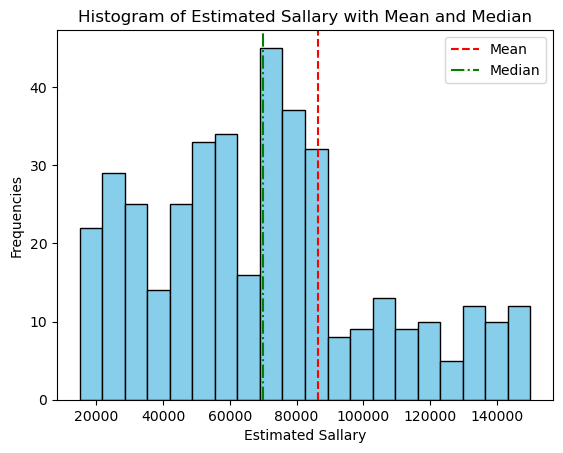

In [64]:
mean = 86272.72
median = 70000.0
#column_name = data["EstimatedSalary"]

# Create a histogram for the 'Income' column
plt.hist(data["EstimatedSalary"],bins=20, edgecolor='black', color='skyblue')

# Add vertical lines for mean and median
plt.axvline(x=mean, color='red', linestyle='--', label='Mean')
plt.axvline(x=median, color='green', linestyle='-.', label='Median')

# Customize the plot
plt.title("Histogram of Estimated Sallary with Mean and Median")
plt.xlabel("Estimated Sallary")
plt.ylabel("Frequencies")
plt.legend()

# Show the plot
plt.show()


In [71]:
# We want to look at the 20 biggest sallarys to see if we have one Outlier that brings up the mean.

top_20_values = data["EstimatedSalary"].nlargest(20)
column_name = "EstimatedSalary"


# Print the result
print(f"The 20 largest values in the '{column_name}' column are:\n{top_20_values}")

The 20 largest values in the 'EstimatedSalary' column are:
7      150000
211    150000
103    149000
240    149000
168    148000
230    147000
245    146000
253    146000
222    144000
261    144000
268    144000
336    144000
219    143000
239    143000
208    142000
284    141000
313    141000
382    139000
287    138000
320    138000
Name: EstimatedSalary, dtype: int64


#### We can se from the code that it is not an Outlier, so we can trust our data.
the sallary has a normal step from the 20 highest income in our dataset. 

### Analyses of the customer that have bought from the campain
* The dataset contains of 400 records, 143 of the records did buy.
* The conversion rate is 35.75%
* The average age of buyers is 46.3 years.
* The yongest buyers is 27 years and the oldest is 60
* The mean estimated sallary from the Buyers is 86272
* The median of estimated income is 70 000, choose to trust my median income after resarch of it. 
* lovest income is 20 000 from the buyers
* highest income from the buyers is 150 000

### We want to do som further analyses of the dataset to make observations  
We want to look at distibution of data between age and Income, for best visulation we have seprated them in to a histogram
and a KDE plot. We also want to cheek out the correlation between Age and income to see if we can asume that income raise with age or Vice Versa. we do this as a data cheek to see if we have good data to later make our predicted model.  

### Histogram of Distubution on age 

C:\Users\glenn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


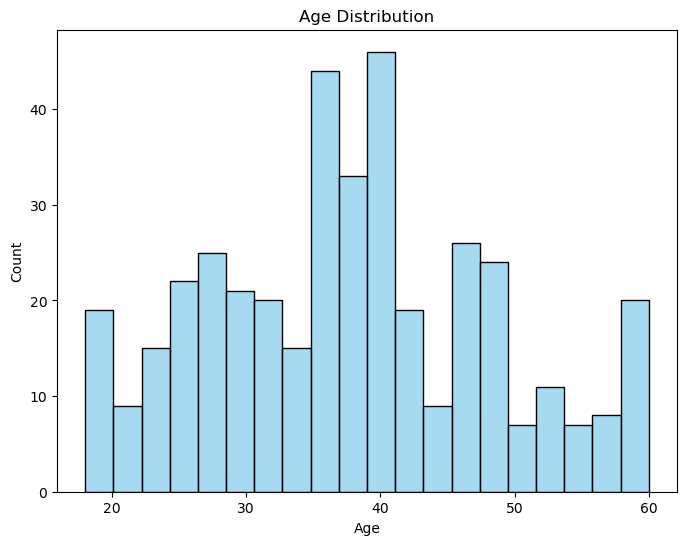

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=False, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


#### We see no abnormal things from this
We can se that we have a nice shaped histogram and that the most data is centred nicely against our median age.

### Histogram of distrubution of income 

C:\Users\glenn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


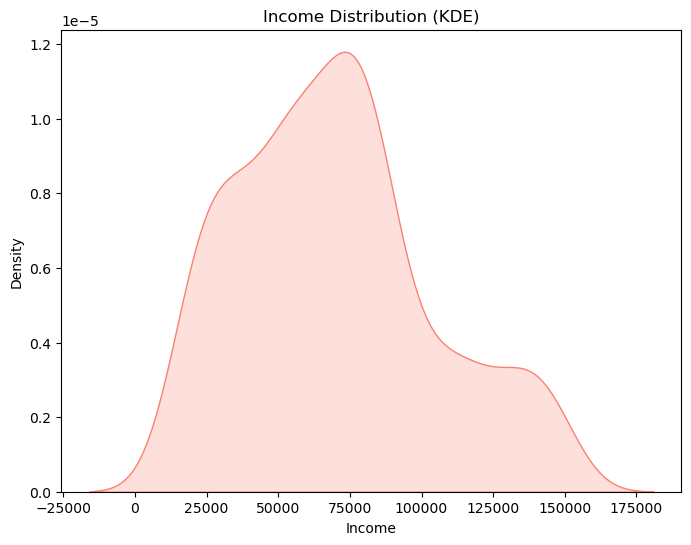

In [16]:
# Create a density plot for income
plt.figure(figsize=(8, 6))
sns.kdeplot(data['EstimatedSalary'], fill=True, color='salmon')
plt.xlabel('Income')
plt.ylabel('Density')
plt.title('Income Distribution (KDE)')
plt.show()

#### The data follows our median and mean nicly and we can see it has a shape i trust

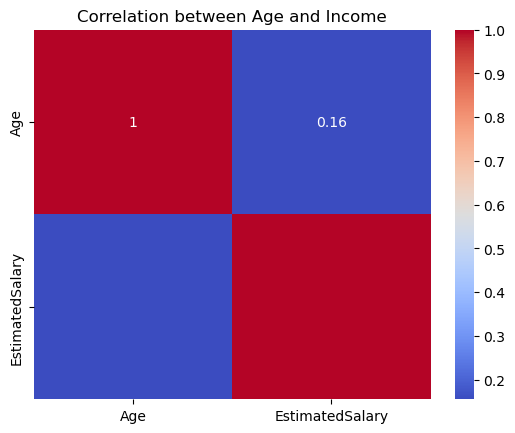

                      Age  EstimatedSalary
Age              1.000000         0.155238
EstimatedSalary  0.155238         1.000000


In [22]:

import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn to create a correlation heatmap
correlation = data[['Age', 'EstimatedSalary']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

plt.title('Correlation between Age and Income')
plt.show()
print(correlation)




#### In the context of our dataset, a correlation of 0.16 between‘age’ and ‘Estimated Sallary’.
would suggest that there is a slight tendency for income to increase with age, but the relationship is weak. There are likely other factors at play influencing income, and age alone does not strongly predict income. 
Remember, correlation does not imply causation. So, while there’s a slight positive relationship, it doesn’t mean increasing age causes an increase in income. It’s also important to consider other factors that might be influencing both age and income.

## Machine learning 
we want to make a model that can predict wath customer we can get asume buy from us 



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



# Define the feature matrix X and the target y
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



C:\Users\glenn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\glenn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\glenn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Try out a new moodel 
the last model we tryed was not good , we have precesion score of 0.65 , we neede at least 0.7 to 
asume it was a good model , therfor we try a new model. We now try a SGDRegressor. 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Define the feature matrix X and the target y
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SGDRegressor model
model = SGDRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.1363712928558485e+37


#### A Mean Squared Error (MSE) of 1.13 can be considered good or not-so-good depending on the context and the specific problem
in our case we have a target colum/variabel that just get "1" for positive and "0" for negative (sale or not sale) then our score is not a good score and we should consider an other model

#### We try out a Ridge model

In [26]:
# Scoring the model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np


# Define the feature matrix X and the target y
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge Regressor model
model = Ridge()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate and print the model score
score = model.score(X_test, y_test)
print(f"Model Score: {score}")


Mean Squared Error: 0.09929793051748957
Model Score: 0.5635255801429031


#### Not a great score her eather , i think we have to try a random forest model or consider get a bether dataset

In [28]:
# We give it a shoot with ramdom forrest

X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split the data in to train, test and split 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Intialize Random Forest clasifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model on the training data

rf_model.fit(X_train, y_train) 

# predict the value of the test data

y_pred = rf_model.predict(X_test) 

# calculate the accurazy of the model 

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the accuracy and clasification report 

print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report_str)






Random Forest Classifier Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.81      0.93      0.87        28

    accuracy                           0.90        80
   macro avg       0.89      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80



### We go for this model . 
We now got a score of 90 % with our random Forest Classifier, as we asume we are not working with selfdriving cars our health problematic where it would be dangerus to have a fault margin of 10 percent i think we can consider this model as as good as it get whit that kind of data we got ( just 400 rovs)

### Inplentation of our new model and make a prediction 
We just have the same dataset as we had before the test , so it would not look so good , but we try do put null collums in all the purchased collums make a new csv file and se if we can get som predictions 

In [36]:
# puting a new value in all of the Purchased colum , we put in a 0 

data2["Purchased"] = 0
# we save it as a new csv file
data2.to_csv("updated_social_ads.csv")

In [50]:
import pandas as pd
# We make a new dataframe with just cero values on purchase collum  
data3 = pd.read_csv('updated_social_ads.csv')  

X_full = data3[['Age', 'EstimatedSalary']]
y_full = data3['Purchased']

# We use our model to predict the target values 

y_full_pred = rf_model.predict(X_full)

# Making a new collum for our predictions 

data3['Predicted_Sale'] = y_full_pred

print("Predictions made on the entire dataset and added to the DataFrame.")


Predictions made on the entire dataset and added to the DataFrame.


In [55]:
data3.head(20) 

,Unnamed: 0,Age,EstimatedSalary,Purchased,Predicted_Sale
0,0,19,19000,0,0
1,1,35,20000,0,0
2,2,26,43000,0,0
3,3,27,57000,0,0
4,4,19,76000,0,0
5,5,27,58000,0,0
6,6,27,84000,0,0
7,7,32,150000,0,1
8,8,25,33000,0,0
9,9,35,65000,0,0


In [56]:
data.head(20)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


### The model works 
we can se now that our models work , it predict that customer on row 7, 16, 17, 18, 19  would do a sale . and in the orginal data set they are a purchased customer